## STEG 1: DATAINSAMLING 

**Uppgift**: Ladda in data och beskriv den

In [23]:
#Importera pandas
import pandas as pd

#Ladda in data från CSV-fil
df_home = pd.read_csv("Real_estate.csv") 
df_home = pd.DataFrame(df_home)

# Visa första 5 raderna
df_home.head() 
print(df_home.head())

#Visa antal rader och kolumner
rader = len(df_home)
kolumner = len(df_home.columns)
print(f"Antal rader: {rader}") 
print(f"Antal kolumner: {kolumner}")

#Lista alla kolumner
columns = list(df_home.columns) 
print("\nKolumner i datasetet:")
print(columns)



   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

Datasetet visar fastighetspriser i Taiwan och de olika faktorer som påverkar dessa priser. X-kolumnerna(input) representerar de faktorer som kan påverka priset, medan kolumnen Y(output) representerar själva fastighetspriset, dvs. det värde vi vill förutsäga. 

---

## STEG 2: DATARENSNING 

**Uppgift**: Verifiera att data är OK

In [56]:
#Kolla efter saknade värden
print("Saknade värden per kolumn:")
print(df_home.isna().sum())


#Kolla efter duplikater
print("\nAntal dubletter (hela rader som är kopior):")
print(df_home.duplicated().sum())


#Visa statistik för numeriska kolumner
print("\nStatistik för numeriska kolumner:")
print(df_home.describe())



#Kolla efter outliers (extremvärden)
cols = ['X2 house age', 
        'X3 distance to the nearest MRT station', 
        'X4 number of convenience stores', 
        'Y house price of unit area']

Q1 = df_home[cols].quantile(0.25)
Q3 = df_home[cols].quantile(0.75)
IQR = Q3 - Q1

outliers = (df_home[cols] < (Q1 - 1.5 * IQR)) | (df_home[cols] > (Q3 + 1.5 * IQR))
rows_with_outliers = df_home[outliers.any(axis=1)]

#Print outlier rows
print("\nRader med outliers:")
print(rows_with_outliers)


Saknade värden per kolumn:
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Antal dubletter (hela rader som är kopior):
0

Statistik för numeriska kolumner:
               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to

**Slutsats**: Datakvaliteten bedöms som OK. Inga uppenbara fel har hittats. Däremot finns det avvikande värden, såsom längre avstånd till MRT, bostäder med ålder 0 eller högre priser men det verkar vara naturliga variationer och inte tecken på fel.

---

## STEG 3: DATAANALYS 

**Uppgift**: Välj 2 analyser med grafer

### ANALYS 1:

**Fråga**: Hur starkt samband finns det mellan antalet närbutiker i ett område och huspriset per kvadratmeter?

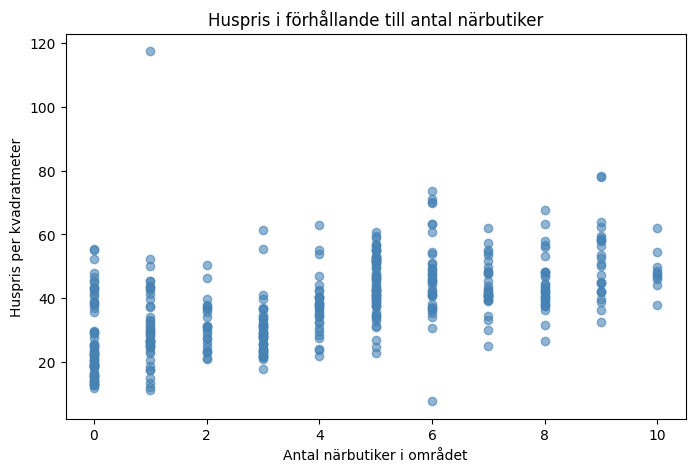

In [57]:
#Importera matplotlib
import matplotlib.pyplot as plt

#Gör din analys här
X = df_home["X4 number of convenience stores"]
Y = df_home["Y house price of unit area"]
 
plt.figure(figsize=(8,5))
plt.scatter(X, Y, alpha=0.6, color="steelblue")
 
plt.title("Huspris i förhållande till antal närbutiker")
plt.xlabel("Antal närbutiker i området")
plt.ylabel("Huspris per kvadratmeter")


#Skapa en graf
plt.grid(True)
plt.show()  

**Resultat**: Grafen visar att områden med fler närbutiker ofta har något högre huspriser. Även om variationen är stor syns en tendens att priserna ökar där tillgängligheten till service är bättre. Detta tyder på att närhet till bekvämligheter spelar en viss roll för bostadspriserna.

---

### ANALYS 2:

**Fråga**: Påverkar äldre hus priset? Är nyare hus dyrare?

Korrelation mellan husets ålder och pris: -0.211
                                              No  X1 transaction date  \
No                                      1.000000            -0.048658   
X1 transaction date                    -0.048658             1.000000   
X2 house age                           -0.032808             0.017549   
X3 distance to the nearest MRT station -0.013573             0.060880   
X4 number of convenience stores        -0.012699             0.009635   
X5 latitude                            -0.010110             0.035058   
X6 longitude                           -0.011059            -0.041082   
Y house price of unit area             -0.028587             0.087491   

                                        X2 house age  \
No                                         -0.032808   
X1 transaction date                         0.017549   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.025622   
X4 number of 

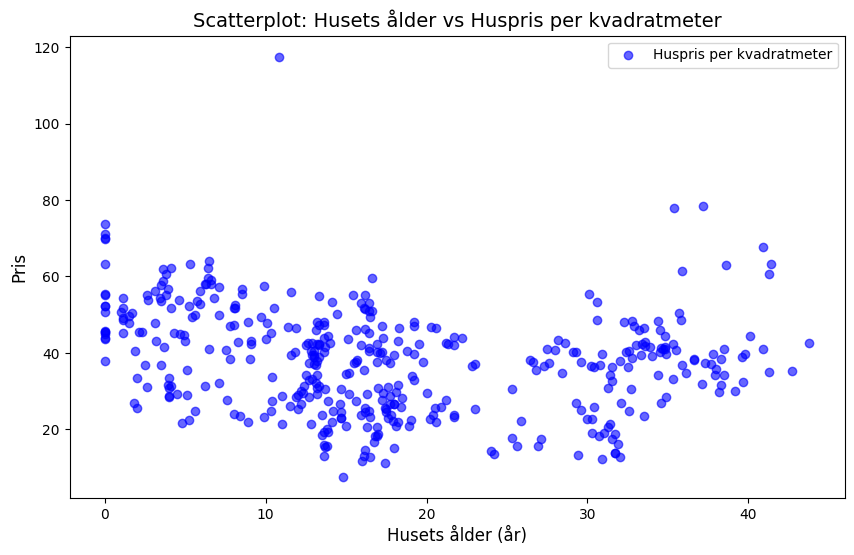

In [53]:
#Analys av korrelation mellan husets ålder och pris per enhet
import matplotlib.pyplot as plt

age = df_home["X2 house age"]
price = df_home["Y house price of unit area"]

#Beräkna korrelation
correlation = age.corr(price)
print("Korrelation mellan husets ålder och pris:", round(correlation, 3))
print(df_home.corr()) #Visa korrelationstabell för alla numeriska kolumner


#Skapa scatterplot
plt.figure(figsize=(10,6))
plt.scatter(df_home["X2 house age"], df_home["Y house price of unit area"], color='blue', alpha=0.6, label='Huspris per kvadratmeter')

#Lägg till titel och etiketter
plt.title("Scatterplot: Husets ålder vs Huspris per kvadratmeter", fontsize=14)
plt.xlabel("Husets ålder (år)", fontsize=12)
plt.ylabel("Pris", fontsize=12)
plt.legend()



#Visa plot
plt.show()


**Resultat**: Det finns en svag negativ linjär relation mellan husets ålder och priset. Nyare hus är generellt dyrare än äldre hus, men korrelationen är inte stark, så andra faktorer påverkar priset mycket mer.  

---

## STEG 4: PREDIKTIV MODELL 

**Uppgift**: Bygg en modell som förutsäger energiförbrukning

### 4.1 Välj Features

**Förklaring**: Vi valde X2(husets ålder), X3(avstånd till närmaste MRT-station), och X4(avstånd till närliggande butiker) eftersom vi tror att dessa faktorer påverkar huspriset. Äldre hus tenderar ofta att vara billigare, hus som ligger nära kollektivtrafik är mer attraktiva och dyrare, och fler närliggande butiker ökar livskvaliteten och därmed priset. 

In [37]:
#Importerta sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

#Features och target 
X = df_home [['X2 house age', 
           'X3 distance to the nearest MRT station', 
           'X4 number of convenience stores']]
Y = df_home ['Y house price of unit area']

#Träning och test (80/20)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Kolla storleken på de olika delarna
print("Träningsdata:", X_train.shape, Y_train.shape)
print("Testdata:", X_test.shape, Y_test.shape)


Träningsdata: (331, 3) (331,)
Testdata: (83, 3) (83,)


### 4.2 Bygg och träna modellen

In [38]:
#Skapa modellen
model = LinearRegression()


#Träna modellen med träningsdata
model.fit(X_train, Y_train) #modellen lär sig sambandet mellan features och target

#Gör prediktioner på testdata
Y_pred = model.predict(X_test) #modellen använder det den lärt sig för att förutsäga pris


print("Modellens koefficienter:", model.coef_) #vikter för varje feature
print("Modellens intercept:", model.intercept_) #baspris när alla features = 0




Modellens koefficienter: [-0.25840543 -0.00549834  1.24734248]
Modellens intercept: 43.51488014404391


### 4.3 Utvärdera modellen

R2 score visar hur stor del av variationen i huspriset som modellen lyckas förklara. 
R2 = 1.0 perfekt modell
R2 = 0.0 inget bättre än medelvärdet
R2 < 0 = sämre än att gissa medelvärdet

R²-score: 0.6489726933106555
MAE: 5.632384069009171


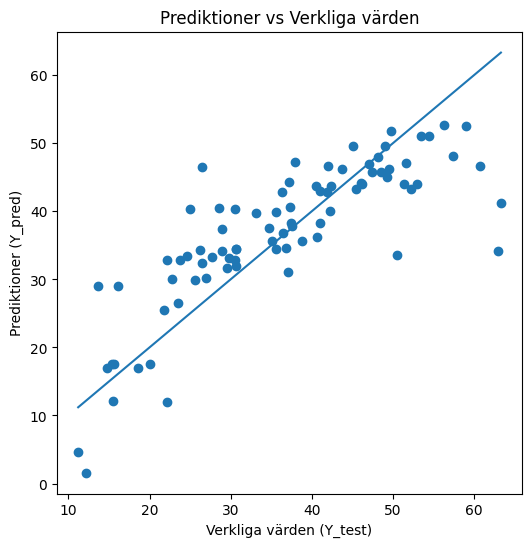

In [41]:
#R² score
r2 = r2_score(Y_test, Y_pred)
print("R²-score:", r2)


#Beräkna MAE (Mean Absolute Error)
mae = mean_absolute_error(Y_test, Y_pred)
print("MAE:", mae)


#Graf som visar prediktioner vs verkliga värden
plt.figure(figsize=(6, 6))
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()])
plt.xlabel("Verkliga värden (Y_test)")
plt.ylabel("Prediktioner (Y_pred)")
plt.title("Prediktioner vs Verkliga värden")
plt.show()


**Resultat**: 
- R² Score: 0.65
- MAE: 5.63

**Diskussion**: Modellen är ganska bra, men inte helt perfekt. Med ett R² värde på ca 0,65 lyckas den förklara en stor del av variationen i huspriserna, men det finns fortfarande faktorer som modellen inte fångar. Grafen visar att många prediktioner ligger nära det perfekta linjen, vilket innebär att modellen gör ofta rimliga förutsägelser. Samtidigt finns det en viss spridning, vilket tyder på att modellen missar en del variation och skulle kunna förbättras med fler eller bättre anpassade features.

---

## STEG 5: REKOMMENDATIONER - VG uppgift

Baserat på era analyser, ge  **1 konkret rekommendation**.

### REKOMMENDATION 1: Beakta husets ålder som en faktor, men använd fler faktorer. 

**Varför**: Baserad på scatterplot analys om husets ålder och pris per kvadratmeter visar analysen en svag negativ korrelation. Detta innebär att äldre hus generellt är något billigare än nyare, men ålder ensam förklarar bara en liten del av prisvariationerna. Andra faktorer, som läge och närhet till transport och livsmedels/närbutik har större påverkan på priset. 

**Åtgärd**: Man bör inkludera husets ålder som en av flera faktorer vid värdering av bostaden, men inte använda den isolerat. Ta även hänsyn till husets storlek, antal rum, näher till MRT eller annan transport, närhet till skolor, parker och shoppingcenter. 

**Effekt**: Genom att kombinera husets ålder med andra relevanta faktorer kan man få en mer realistisk och informerad uppskattning av marknadsvärdet. Modellen blir mer exakt (R2) vilket minskar risken för över eller undervärdering av bostaden och leder till bättre beslut vid köp eller försäljning. 

---